# Visualize Headphone Recordings

In [1]:
import numpy as np
import sounddevice as sd
import soundfile as sf
from numpy import ndarray
from numpy.fft import fft, ifft
from shared.record_signal import convert_audio_to_numpy_array
import matplotlib.pyplot as plt

### Global Parameters

In [3]:
# define global parameters
fs = 44100
nyquist = fs / 2.0
recording_count = 10
headphones = ['Beats_Detox']

### Visualize Impulse Response

In [21]:
def get_average_of_impulse_response_time_domain(headphone: str, recording_count: int, i: int):
    y_l_sum = np.empty([17640])
    y_r_sum = np.empty([17640])

    audio, fs = convert_audio_to_numpy_array(f"../HPIRs_Erbes_44100Hz/Measurements/{headphone}/pass0{i}.wav")

    y_l_sum = y_l_sum + audio[:, 0]
    y_r_sum = y_l_sum + audio[:, 1]

    y_l_avg = y_l_sum / recording_count
    y_r_avg = y_r_sum / recording_count

    avg = np.append([y_l_avg], [y_r_avg], axis = 0)

    return avg

In [ ]:
""" def get_average_of_impulse_response_freq_domain(headphone: str, recording_count: int, i: int):
    y_l_sum = np.empty([17640])
    y_r_sum = np.empty([17640])

    audio, fs = convert_audio_to_numpy_array(f"../HPIRs_Erbes_44100Hz/Measurements/{headphone}/pass0{i}.wav")

    y_l = audio[:, 0]
    y_r = audio[:, 1]

    recording

    return avg """

In [22]:
headphones_impulse_responses = {}
for i in range(len(headphones)):
    key = headphones[i]
    value = get_average_of_impulse_response_time_domain(headphones[i], recording_count, i)
    headphones_impulse_responses[key] = value

In [23]:
def visualize_impulse_response(headphone: str, avg_impulse_response: ndarray):
    y = avg_impulse_response.transpose()
    y_l = y[:, 0]
    y_r = y[:, 1]
    t_vec = np.arange(0, np.size(y_l)) / fs


    fig, ((ax3, ax4)) = plt.subplots(1, 2, figsize=(19, 6), sharex='row', sharey='row')
    ax3.plot(t_vec, y_l)
    ax3.set_title("IR Left (zoomed in)")
    ax3.set_xlabel('Seconds')
    ax3.set_ylabel("Amplitude")

    ax4.plot(t_vec, y_r)
    ax4.set_title("IR Right (zoomed in)")
    ax4.set_xlabel('Seconds')
    ax4.set_ylabel("Amplitude")

    ax3.set_xlim([0.0, 0.003])

    fig.suptitle(f'Impulse Response (IR) of {headphone}', fontsize=16)

In [41]:
# headphones_impulse_responses

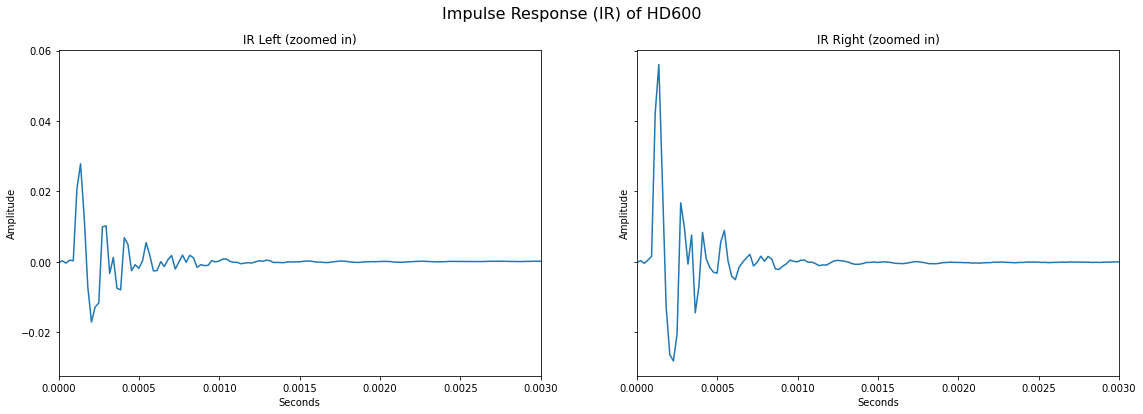

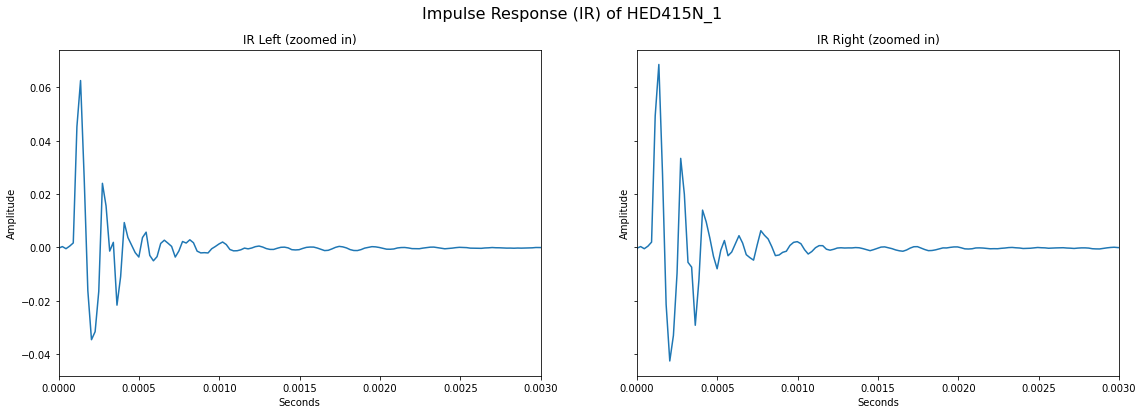

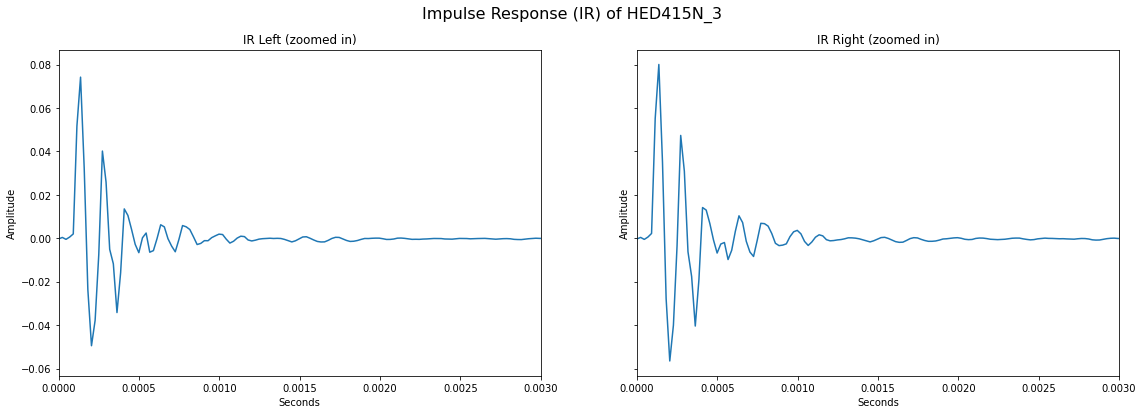

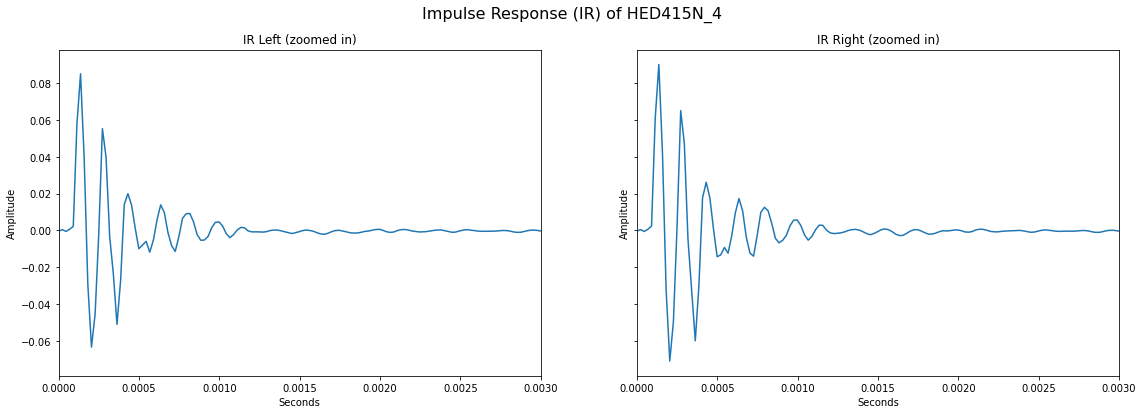

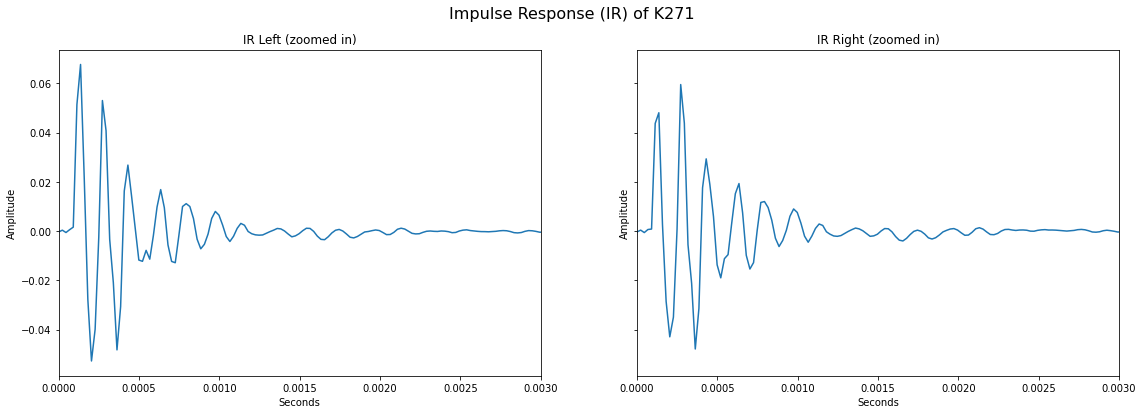

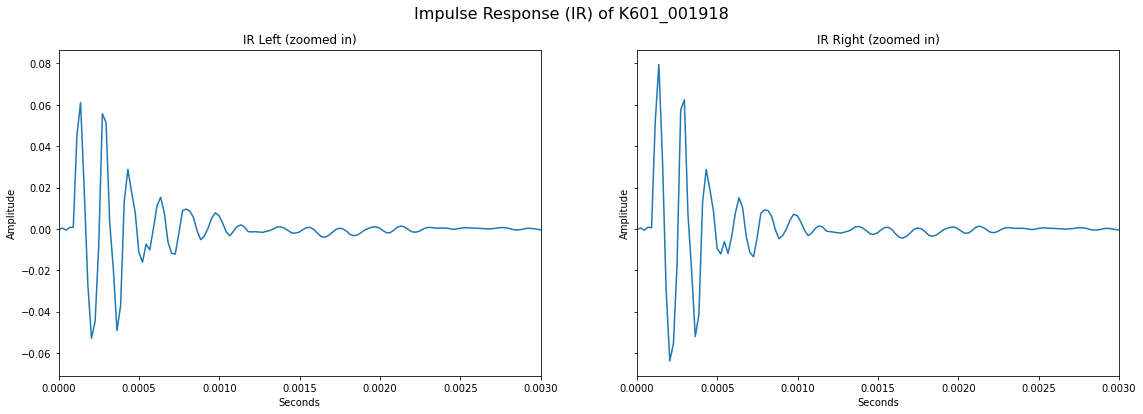

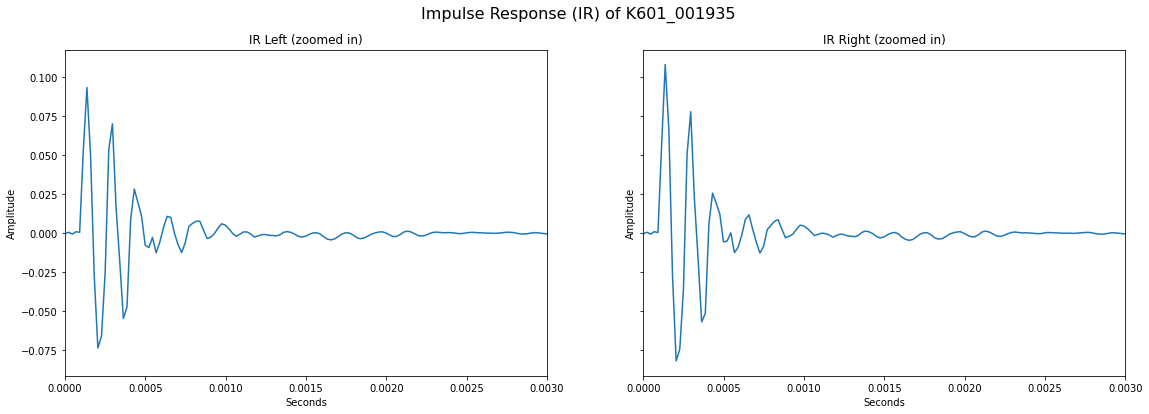

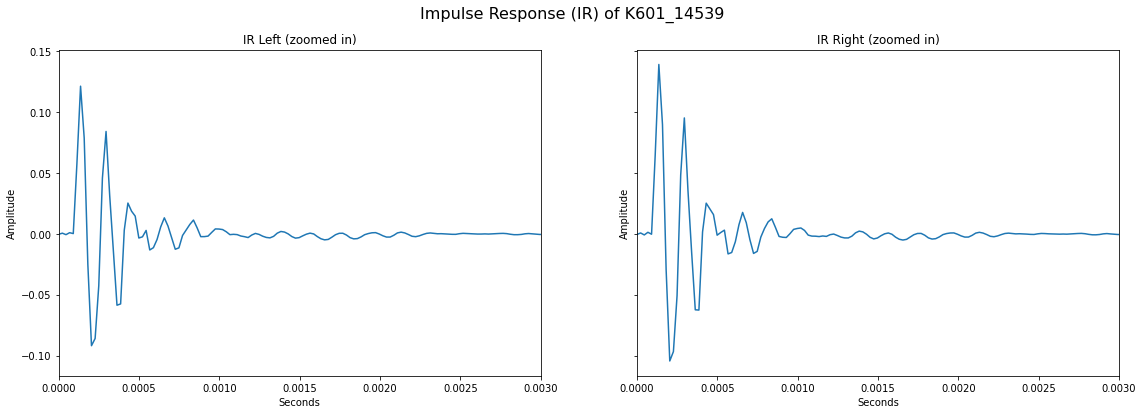

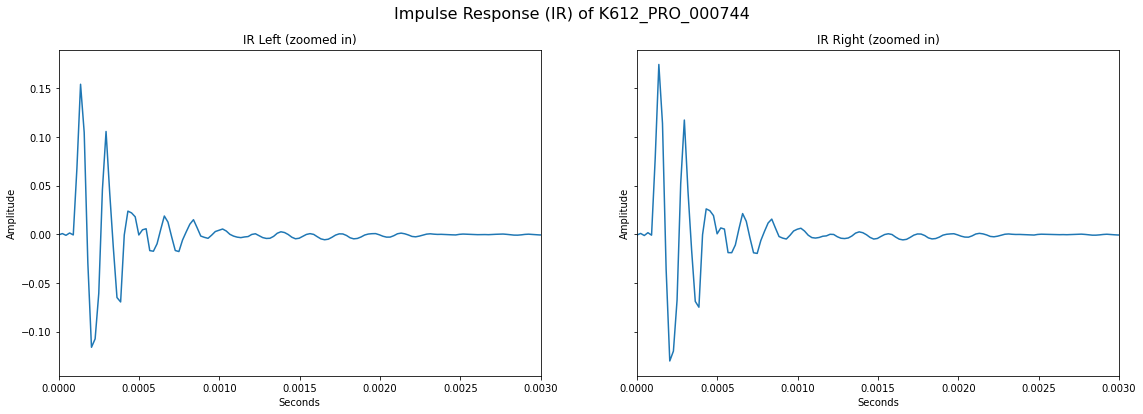

In [24]:
#for headphone in headphones:
#    visualize_impulse_response(headphone, headphones_impulse_responses[headphone])